In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv(r"..\Data\01_raw\train.csv")
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [3]:
train.shape

(3000888, 6)

In [4]:
output = []

for column in train.columns:

    null_values  = np.sum(pd.isna(train[column]))
    unique = train[column].nunique()
    column_data_type = train[column].dtype

    output.append([column, null_values, unique, column_data_type])

output_df = pd.DataFrame(output, columns = ['column','null values', 'unique', 'datatype'])

describe_df = train.describe().transpose() 
combine_df = pd.concat([ output_df.set_index('column'), describe_df], axis = 1, join='outer')

combine_df

,null values,unique,datatype,count,mean,std,min,25%,50%,75%,max
id,0,3000888,int64,3000888.0,1.500444e+06,866281.891642,0.0,750221.75,1500443.5,2.250665e+06,3000887.0
date,0,1684,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_nbr,0,54,int64,3000888.0,2.750000e+01,15.585787,1.0,14.00,27.5,4.100000e+01,54.0
family,0,33,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales,0,379610,float64,3000888.0,3.577757e+02,1101.997721,0.0,0.00,11.0,1.958473e+02,124717.0
onpromotion,0,362,int64,3000888.0,2.602770e+00,12.218882,0.0,0.00,0.0,0.000000e+00,741.0


In [5]:
train.drop_duplicates(inplace=True)

In [6]:
train.shape

(3000888, 6)

<Axes: ylabel='sales'>

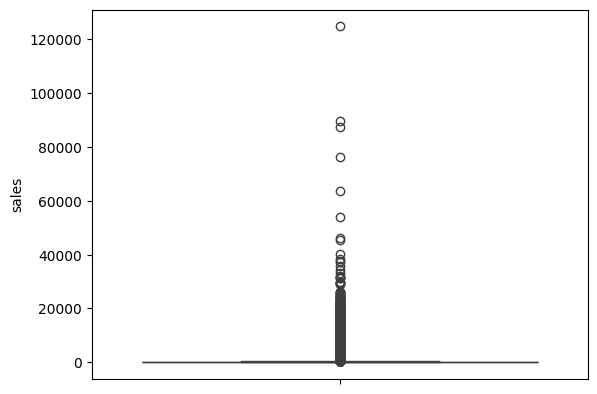

In [7]:
sns.boxplot(y=train['sales'] )

<Axes: ylabel='onpromotion'>

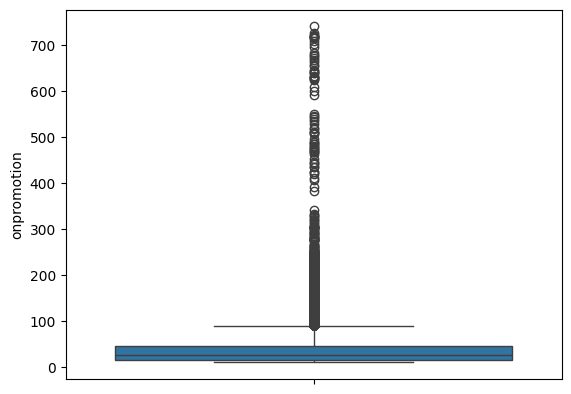

In [11]:
sns.boxplot(y = train['onpromotion'] )

<Axes: xlabel='onpromotion', ylabel='Count'>

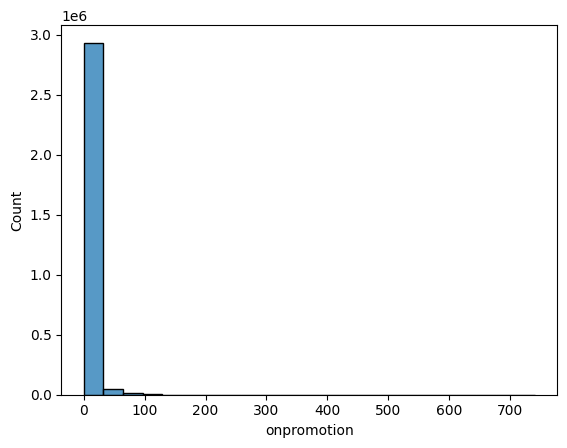

In [14]:
sns.histplot(data = train, x = 'onpromotion')

([<matplotlib.axis.XTick at 0x1658a7ac3d0>,
 [Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017')])

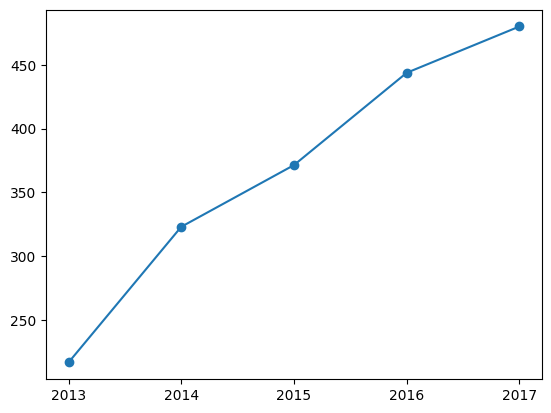

In [9]:
train['year'] = pd.DatetimeIndex(train['date']).year

yearly_data = train.groupby('year')['sales'].mean().reset_index()
plt.plot(yearly_data['year'], yearly_data['sales'], marker='o')

plt.xticks(range(2013, 2018))